In [1]:
from src.models.train_model_keras import load_data
from sklearn.metrics import confusion_matrix
from src.models.predict_model_bert import make_prediction, load_pickle
from src.visualization.visualize import plot_confusion_matrix, show_mistakes
from src.data.utils import find_mistakes
from transformers import BertTokenizer, TFBertForSequenceClassification

from tensorflow import keras
import pandas as pd

[nltk_data] Downloading package punkt to /Users/pboers/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pboers/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
DATA_PATH = "../data/interim"

TRAIN_PATH = f"{DATA_PATH}/train250.csv"
TEST_PATH = f"{DATA_PATH}/test50.csv"

MODEL_PATH = "../models/BERT"

In [3]:
# Load data.
df_test = pd.read_csv(TEST_PATH)
X_test, y_test = df_test["body"], df_test["label"]

# Load model.
model = TFBertForSequenceClassification.from_pretrained(MODEL_PATH, num_labels=2)

# Load tokenizer.
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at ../models/BERT.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [4]:
x_list = X_test.values.tolist()

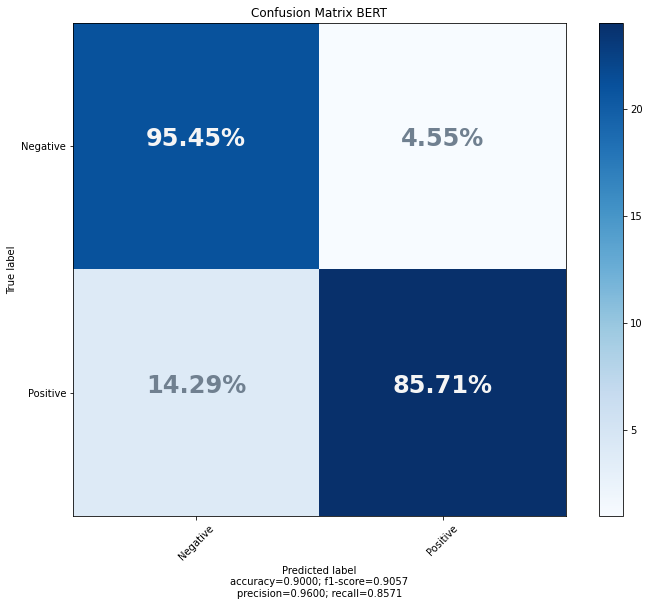

In [5]:
# Make predictions lstm
y_pred = make_prediction(model, tokenizer, x_list)

# PLot confusion matrix lstm
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plot_confusion_matrix(cm, "Confusion Matrix BERT", ['Negative', 'Positive'], save=True)

In [6]:
# Show some examples that were predicted incorrectly.
LABELS = {0: "NEGATIVE", 1: "POSITIVE"}

indices = find_mistakes(y_test.to_numpy(), y_pred)

for idx in indices[:5]:
        print(
            f"(not {y_pred[idx[0]]}):"
            + X_test.iloc[idx].to_string(index=False)
            + "\n"
        )

(not 0): Reviewed quite a bit of the combo players and was hesitant due to unfavorable reviews and size of machines. I am weaning off my VHS collection, but don't want to replace them with DVD's. This unit is well built, easy to setup and resolution and s...

(not 1): Firstly,I enjoyed the format and tone of the book (how the author addressed the reader). However, I did not feel that she imparted any insider secrets that the book promised to reveal. If you are just starting to research law school, and do not k...

(not 0): i bought this item to connect to a strobe light. unit functions well. not sure that it has all the range claimed, but i never really believe everything a manufacturer claims about a product like this. just too many variables. I can say it works f...

(not 0): ive got a lamp in the corner of my room behind my desk thats a complete pain in the arse to turn on and off. ive been using this with the lamp for a month now and it works perfectly. added a little velcro and no